In [31]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
Fruits = ['Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3','Apple Red 1', 'Apple Red 2', 'Apple Red 3', 
          'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red Delicious', 
          'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 
          'Banana Red', 'Banana Lady Finger', 'Beetroot', 
          'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2',
          'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 
          'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow',
          'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant', 
          'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White',
          'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 
          'Huckleberry', 'Kiwi', 'Kaki', 'Kohlrabi', 
          'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 
          'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Kumquats',
          'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat',
          'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion White', 'Onion Red Peeled',
          'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat',
          'Pepino', 'Pear', 'Pear Abate','Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Williams',
          'Pepper Red', 'Pepper Green', 'Pepper Yellow', 
          'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 
          'Pitahaya Red', 'Plum', 'Plum 2', 'Plum 3', 
          'Pomegranate', 'Pomelo Sweetie', 'Potato Red', 'Potato Red Washed', 'Potato Sweet', 'Potato White', 
          'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 
          'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 
          'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Maroon', 'Tomato Yellow', 'Walnut', 
           ]

In [33]:
len(Fruits)

114

In [34]:
fruit_images = []
labels = [] 


#Get Training Data
for dirname, _, filenames in os.walk('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/'):
    fruit_label = dirname.split("/")[-1]
    #if current fruit is in the 'Fruits' array defined above
    #then get all the data
    if fruit_label in Fruits:
        for filename in filenames: 
            path = os.path.join(dirname, filename) 
            image = cv2.imread(path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (45, 45)) 
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            fruit_images.append(image) 
            labels.append(fruit_label)
        

In [35]:
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [36]:
ltoi = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in ltoi.items()}

In [37]:
id_to_label_dict

{0: 'Apple Crimson Snow',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Pink Lady',
 6: 'Apple Red 1',
 7: 'Apple Red 2',
 8: 'Apple Red 3',
 9: 'Apple Red Delicious',
 10: 'Apricot',
 11: 'Avocado',
 12: 'Avocado ripe',
 13: 'Banana',
 14: 'Banana Lady Finger',
 15: 'Banana Red',
 16: 'Beetroot',
 17: 'Blueberry',
 18: 'Cactus fruit',
 19: 'Cantaloupe 1',
 20: 'Cantaloupe 2',
 21: 'Carambula',
 22: 'Cauliflower',
 23: 'Cherry 1',
 24: 'Cherry 2',
 25: 'Cherry Rainier',
 26: 'Cherry Wax Black',
 27: 'Cherry Wax Red',
 28: 'Cherry Wax Yellow',
 29: 'Chestnut',
 30: 'Clementine',
 31: 'Cocos',
 32: 'Dates',
 33: 'Eggplant',
 34: 'Ginger Root',
 35: 'Granadilla',
 36: 'Grape Blue',
 37: 'Grape Pink',
 38: 'Grape White',
 39: 'Grapefruit Pink',
 40: 'Grapefruit White',
 41: 'Guava',
 42: 'Hazelnut',
 43: 'Huckleberry',
 44: 'Kaki',
 45: 'Kiwi',
 46: 'Kohlrabi',
 47: 'Kumquats',
 48: 'Lemon',
 49: 'Lemon Meyer',
 50: 'Limes',
 51: 'Ly

In [38]:
label_ids = np.array([ltoi[x] for x in labels])
  


Scale Data Images

In [39]:
scaler = StandardScaler()


In [40]:
images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])


Data in 50D

In [41]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(images_scaled)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, label_ids, test_size=0.25, random_state=42)

Get Validation Data

In [43]:
validation_fruit_images = []
validation_labels = [] 

for dirname, _, filenames in os.walk('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/'):
    fruit_label = dirname.split("/")[-1]
    if fruit_label in Fruits:
        for filename in filenames: 
            image_path = os.path.join(dirname, filename) 
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            image = cv2.resize(image, (45, 45))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            validation_fruit_images.append(image)
            validation_labels.append(fruit_label)

validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [44]:
len(validation_fruit_images)

19587

In [45]:
validation_label_ids = np.array([ltoi[x] for x in validation_labels])


In [46]:
validation_images_scaled = scaler.transform([i.flatten() for i in validation_fruit_images])

In [47]:
validation_pca_result = pca.transform(validation_images_scaled)

In [ ]:
#debug
print(len(X_train), len(y_train), len(X_test), len(y_test) )
print(type(X_train), type(y_train), type(X_test), type(y_test) )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

# K-Nearest Neighbours
Evaluated for different k values

In [48]:
train_accuracy = dict()
test_accuracy = dict()
k_values = []
for k in range(1, len(Fruits), 10):
    k_values.append(k)

print('begin training')
for k in k_values:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit
       
    #Fit the model
    knn.fit(X_train,y_train) 
 
   
    
    #Compute accuracy on the training set
    #train_accuracy[k] = knn.score(X_train, y_train)
    test_predictions = knn.predict(X_test)
    precision = accuracy_score(test_predictions, y_test) * 100
    train_accuracy[k]=precision
    #Compute accuracy on the test set
    
  
    test_predictions = knn.predict(validation_pca_result)
    precision = accuracy_score(test_predictions, validation_label_ids) * 100
    test_accuracy[k] = precision
    
    print(k, train_accuracy[k], test_accuracy[k])
print('end knn')




begin training
1 99.97909116253136 94.01133404809312
11 99.40061332589907 88.73232245877367
21 97.86032896570951 85.07173125031909
31 96.55004181767494 82.46796344514219
41 95.16308893225536 80.07862357686221
51 93.73431837189852 78.0313473222035
61 92.38918316141623 76.33634553530403
71 91.07889601338167 75.04467248685353
81 89.678003902983 73.72236687598918
91 88.58377474212433 72.30816357788329
101 87.28045720657931 70.97564711288099


KeyboardInterrupt: 

Accuracy with knn: 99.972122
Validation Accuracy with knn: 94.011334


In [ ]:
#OUTPUT
# begin training
# 1 1.0 0.9997909116253136
# 11 0.9958644083548245 0.9939364371340953
# 21 0.9843405125345601 0.9784638974073041
# 31 0.96970330614995 0.9651519375522721
# 41 0.9565995213865849 0.9516308893225537
# 51 0.942891661439093 0.9372037914691943
# 61 0.9284403243419066 0.9227766936158349
# 71 0.9156850444924607 0.9102313911346529
# 81 0.902860063660231 0.8968497351547254
# 91 0.8908714946214075 0.8852801784220797
# 101 0.8797425710369183 0.872177306941734
# 111 0.8697288631769708 0.8616531920825202
# end training

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

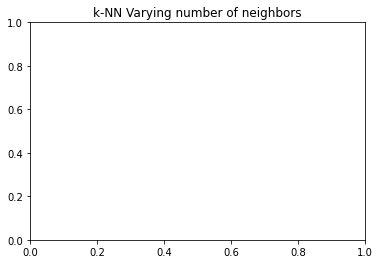

In [60]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

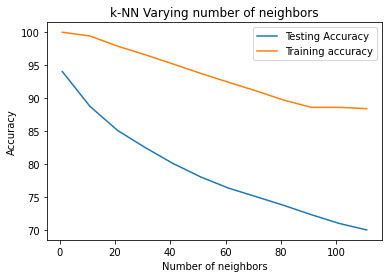

In [ ]:

# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit
# knn.fit(X_train,y_train)    

# test_predictions = knn.predict(X_test)
# #print(V1.predict(X_test))
# precision = accuracy_score(test_predictions, y_test) * 100
# print("Accuracy with knn: {0:.6f}".format(precision))
# test_predictions = knn.predict(validation_pca_result)
# precision = accuracy_score(test_predictions, validation_label_ids) * 100
# print("Validation Accuracy with knn: {0:.6f}".format(precision))
#print(confusion_matrix(y_test,predict_test))

# SVM

In [ ]:

#svc=SVC() #Default hyperparameters
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#print('Default SVM | Accuracy:', metrics.accuracy_score(y_test,y_pred))

#svc = SVC(kernel = 'linear')
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#acc = metrics.accuracy_score(y_test, y_pred)
#print(acc)

#svc = SVC(kernel = 'rbf')
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#acc = metrics.accuracy_score(y_test, y_pred)
#print(acc)

#svc = SVC(kernel = 'poly')
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#acc = metrics.accuracy_score(y_test, y_pred)
#print(acc)

svc = SVC(kernel = 'poly',probability=True)
svc.fit(X_train,y_train)
test_predictions = knn.predict(X_test)
#print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with knn: {0:.6f}".format(precision))
test_predictions = knn.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with knn: {0:.6f}".format(precision))

In [51]:
svc = SVC(kernel = 'linear',probability=True)
svc.fit(X_train,y_train)
test_predictions = svc.predict(X_test)
#print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with linear svc: {0:.6f}".format(precision))
test_predictions = svc.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with linear svc: {0:.6f}".format(precision))

Accuracy with linear svc: 99.951213
Validation Accuracy with linear svc: 96.778476


In [52]:
svc = SVC(kernel = 'poly',probability=True)
svc.fit(X_train,y_train)
test_predictions = svc.predict(X_test)
#print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with polynomial svc: {0:.6f}".format(precision))
test_predictions = svc.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with polynomial svc: {0:.6f}".format(precision))

Accuracy with polynomial svc: 97.888207
Validation Accuracy with polynomial svc: 90.396692


In [53]:
svc = SVC(kernel = 'rbf',probability=True)
svc.fit(X_train,y_train)
test_predictions = svc.predict(X_test)
#print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with rbf svm: {0:.6f}".format(precision))
test_predictions = svc.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with rbf svm: {0:.6f}".format(precision))

Accuracy with rbf svm: 99.832729
Validation Accuracy with knn: 95.675703


Accuracy with linear svc: 99.951213
Validation Accuracy with linear svc: 96.778476




Random Forest Classifier

1 estimator

In [ ]:
forest = RandomForestClassifier(n_estimators=1)
forest = forest.fit(X_train, y_train)

In [ ]:
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)


In [ ]:
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

5 estimator

In [ ]:
forest = RandomForestClassifier(n_estimators=5)
forest = forest.fit(X_train, y_train)

In [ ]:
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)



In [ ]:
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

10 estimator

In [ ]:
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(X_train, y_train)

In [ ]:
test_predictions = forest.predict(X_test)
print(np.array(test_predictions))

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
print(test_predictions)


In [ ]:
test_predictions = forest.predict(validation_pca_result)

In [ ]:
#precision = accuracy_score(test_predictions, validation_label_ids) * 100
#print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))
#print(confusion_matrix(test_predictions,validation_label_ids))
#disp = plot_confusion_matrix(RandomForestClassifier, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues,normalize=normalize)
#disp.ax_.set_title(title)
#print(title)
#print(disp.confusion_matrix)
#print(confusion_matrix(test_predictions,validation_label_ids))
#print(classification_report(test_predictions,validation_label_ids))



In [ ]:
forest = RandomForestClassifier(n_estimators=15)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=25)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=40)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=70)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision= accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [54]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [55]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

Accuracy with RandomForest: 99.937273


In [56]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

Validation Accuracy with Random Forest: 91.468831


In [ ]:
forest = RandomForestClassifier(n_estimators=200)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=300)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=400)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=700)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=1000)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=2000)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
#svm_clf = svm.SVC()
#svm_clf = svm_clf.fit(X_train, y_train) 

In [ ]:
#test_predictions = svm_clf.predict(X_test)


In [ ]:
#precision = accuracy_score(test_predictions, y_test) * 100
#print("Accuracy with SVM: {0:.6f}".format(precision))

In [ ]:
#test_predictions = svm_clf.predict(validation_pca_result)

In [58]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='soft')
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
#print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting: {0:.6f}".format(precision))


Accuracy with Majority Voting: 99.916365
Validation Accuracy with Majority Voting: 93.643743


In [59]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='hard')
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting 2: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting 2: {0:.6f}".format(precision))

KeyboardInterrupt: 

In [ ]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='soft', weights=[1,2,1])
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting: {0:.6f}".format(precision))

In [ ]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='hard', weights=[1,2,1])
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting 4: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting 4: {0:.6f}".format(precision))